In [59]:
# Bibliotecas
import pandas            as pd
import pathlib
import numpy             as np
import seaborn           as sns
import matplotlib.pyplot as plt

In [55]:
#pd.get_option('display.max_colwidth')
pd.set_option('display.max_colwidth',50)
pd.set_option("max_columns", 500)
pd.set_option('display.float_format', lambda x: '%.4f' % x)  ## ajusta exibição no pandas


# ETL

In [ ]:
# carrega os dados
%time

meses = {'jan': 1, 'fev':2, 'mar':3, 'abr': 4, 'mai':5, 'jun': 6, 'jul': 7, 'ago': 8, 'set': 9, 'out': 10, 'nov': 11, 'dez': 12}

caminho_bases = pathlib.Path(r'F:\2021\estudo\hashtag\10-02\dataset')

base_airbnb = pd.DataFrame()

for arquivo in caminho_bases.iterdir():
    print(arquivo.name)
    nome_mes = arquivo.name[:3]
    mes = meses[nome_mes]
    
    ano = arquivo.name[-8:]
    ano = int(ano.replace('.csv', ''))
    
    df = pd.read_csv(caminho_bases / arquivo.name, low_memory=False)
    df['ano'] = ano
    df['mes'] = mes
    base_airbnb = base_airbnb.append(df)


In [23]:
display(base_airbnb.head(3))

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,ano,mes,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,number_of_reviews_ltm,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,14063,https://www.airbnb.com/rooms/14063,20180414160018,2018-04-14,Living in a Postcard,"Besides the most iconic's view, our apartment ...",NaN,"Besides the most iconic's view, our apartment ...",none,Best and favorite neighborhood of Rio. Perfect...,NaN,Everything is there. METRO is 5 min walk. Dir...,NaN,NaN,strictly no smoking in the apartment ! We want...,NaN,NaN,https://a0.muscache.com/im/pictures/66421/ae9b...,NaN,53598,https://www.airbnb.com/users/show/53598,Shalev,2009-11-12,FL,"Hello , my name is Shalev , I am an orchestra ...",NaN,NaN,NaN,f,https://a0.muscache.com/im/users/53598/profile...,https://a0.muscache.com/im/users/53598/profile...,Botafogo,1.0,1.0,"['email', 'phone', 'reviews', 'jumio']",t,t,"Rio de Janeiro, RJ, Brazil",Botafogo,Botafogo,NaN,Rio de Janeiro,RJ,22250-040,Rio De Janeiro,"Rio de Janeiro, Brazil",BR,Brazil,-22.946854,-43.182737,t,Apartment,Entire home/apt,4,1.0,0.0,2.0,Real Bed,"{TV,Internet,""Air conditioning"",Kitchen,Doorma...",NaN,$133.00,$823.00,"$2,698.00","$1,025.00",$102.00,2,$34.00,60,365,7 weeks ago,t,28,58,88,363,2018-04-14,38,2010-01-03,2018-03-04,91.0,9.0,9.0,9.0,9.0,9.0,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,0.38,2018,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17878,https://www.airbnb.com/rooms/17878,20180414160018,2018-04-14,Very Nice 2Br - Copacabana - WiFi,Please note that special rates apply for New Y...,- large balcony which looks out on pedestrian ...,Please note that special rates apply for New Y...,none,This is the best spot in Rio. Everything happe...,NaN,Excellent location. Close to all major public ...,The entire apartment is yours. It is a vacatio...,I will be available throughout your stay shoul...,Please leave the apartment in a clean fashion ...,NaN,NaN,https://a0.muscache.com/im/pictures/65320518/3...,NaN,68997,https://www.airbnb.com/users/show/68997,Matthias,2010-01-08,"Rio de Janeiro, Rio de Janeiro, Brazil",I used to work as a journalist all around the ...,within an hour,100%,NaN,t,https://a0.muscache.com/im/pictures/67b13cea-8...,https://a0.muscache.com/im/pictures/67b13cea-8...,Copacabana,2.0,2.0,"['email', 'phone', 'reviews']",t,f,"Rio de Janeiro, Rio de Janeiro, Brazil",Copacabana,Copacabana,NaN,Rio de Janeiro,Rio de Janeiro,22020-050

In [ ]:
base_airbnb.columns

In [ ]:
print(base_airbnb['experiences_offered'].value_counts())

In [24]:
# depois de avaliar algumas colunas, sobrou alguns ...

colunas = ['host_response_time','host_response_rate','host_is_superhost','host_listings_count','latitude','longitude','property_type','room_type','accommodates','bathrooms','bedrooms','beds','bed_type','amenities','price','security_deposit','cleaning_fee','guests_included','extra_people','minimum_nights','maximum_nights','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','instant_bookable','is_business_travel_ready','cancellation_policy','ano','mes']

base_airbnb = base_airbnb.loc[:, colunas]
print(list(base_airbnb.columns))
display(base_airbnb.head())

['host_response_time', 'host_response_rate', 'host_is_superhost', 'host_listings_count', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'is_business_travel_ready', 'cancellation_policy', 'ano', 'mes']


,host_response_time,host_response_rate,host_is_superhost,host_listings_count,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,ano,mes
0,NaN,NaN,f,1.0,-22.946854,-43.182737,Apartment,Entire home/apt,4,1.0,0.0,2.0,Real Bed,"{TV,Internet,""Air conditioning"",Kitchen,Doorma...",$133.00,"$1,025.00",$102.00,2,$34.00,60,365,38,91.0,9.0,9.0,9.0,9.0,9.0,9.0,f,f,strict_14_with_grace_period,2018,4
1,within an hour,100%,t,2.0,-22.965919,-43.178962,Condominium,Entire home/apt,5,1.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$270.00,$0.00,$273.00,2,$51.00,4,90,205,93.0,10.0,9.0,10.0,10.0,9.0,9.0,t,f,strict,2018,4
2,within an hour,100%,f,1.0,-22.985698,-43.201935,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",""First ...",$222.00,$851.00,$211.00,2,$215.00,3,90,85,95.0,10.0,10.0,10.0,10.0,10.0,9.0,f,f,strict,2018,4
3,within an hour,100%,f,3.0,-22.977117,-43.190454,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$161.00,"$1,000.00",$220.00,2,$45.00,4,30,208,94.0,9.0,10.0,10.0,10.0,10.0,9.0,f,f,strict,2018,4
4,within an hour,100%,t,1.0,-22.983024,-43.214270,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$222.00,NaN,$85.00,2,$68.00,2,1125,200,96.0,10.0,10.0,10.0,10.0,10.0,9.0,t,f,strict,2018,4


In [26]:
# tratar valores faltantes - nan
print(base_airbnb.isnull().sum())

host_response_time             401843
host_response_rate             401846
host_is_superhost                 460
host_listings_count               460
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                        1724
bedrooms                          850
beds                             2502
bed_type                            0
amenities                           0
price                               0
security_deposit               421280
cleaning_fee                   313506
guests_included                     0
extra_people                        0
minimum_nights                      0
maximum_nights                      0
number_of_reviews                   0
review_scores_rating           448016
review_scores_accuracy         448586
review_scores_cleanliness      448413
review_scores_checkin          448650
review_score

In [28]:
# varrer as linhas e eliminar as colunas onde o tem mais de 300k de linhas vazias
for coluna in base_airbnb:
    if base_airbnb[coluna].isnull().sum() > 300000:
        print(coluna)
        base_airbnb = base_airbnb.drop(coluna, axis=1)


print(base_airbnb.isnull().sum())
print(base_airbnb.shape)


host_response_time
host_response_rate
security_deposit
cleaning_fee
review_scores_rating
review_scores_accuracy
review_scores_cleanliness
review_scores_checkin
review_scores_communication
review_scores_location
review_scores_value
host_is_superhost            460
host_listings_count          460
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
bathrooms                   1724
bedrooms                     850
beds                        2502
bed_type                       0
amenities                      0
price                          0
guests_included                0
extra_people                   0
minimum_nights                 0
maximum_nights                 0
number_of_reviews              0
instant_bookable               0
is_business_travel_ready       0
cancellation_policy            0
ano                            0
mes                            0
dtype: int

In [29]:
base_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 902210 entries, 0 to 34328
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   host_is_superhost         901750 non-null  object 
 1   host_listings_count       901750 non-null  float64
 2   latitude                  902210 non-null  float64
 3   longitude                 902210 non-null  float64
 4   property_type             902210 non-null  object 
 5   room_type                 902210 non-null  object 
 6   accommodates              902210 non-null  int64  
 7   bathrooms                 900486 non-null  float64
 8   bedrooms                  901360 non-null  float64
 9   beds                      899708 non-null  float64
 10  bed_type                  902210 non-null  object 
 11  amenities                 902210 non-null  object 
 12  price                     902210 non-null  object 
 13  guests_included           902210 non-null  in

In [30]:
# limpando as linhas com nan

base_airbnb = base_airbnb.dropna()

print(base_airbnb.shape)

(897709, 23)


In [46]:
# verificar tipo de dados - ajustar o price e o extra_people

print(base_airbnb['price'].str.replace('$','').str.replace(',','').astype(np.float32))

0       133.00
1       270.00
2       222.00
3       161.00
4       222.00
         ...  
34324   121.00
34325   799.00
34326   420.00
34327   250.00
34328    92.00
Name: price, Length: 897709, dtype: float32


In [48]:
# muda no df
base_airbnb['price'] = base_airbnb['price'].str.replace('$','')
base_airbnb['price'] = base_airbnb['price'].str.replace(',','')
base_airbnb['price'] = base_airbnb['price'].astype(np.float32, copy=False)

#base_airbnb['extra_people'] = base_airbnb['extra_people'].str.replace('$','').str.replace(',','').astype(np.float32, copy=False)
            
            
print(base_airbnb.dtypes)

<ipython-input-48-80f6b9037ab2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_airbnb['price'] = base_airbnb['price'].str.replace('$','').str.replace(',','').astype(np.float32, copy=False)
<ipython-input-48-80f6b9037ab2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_airbnb['extra_people'] = base_airbnb['extra_people'].str.replace('$','').str.replace(',','').astype(np.float32, copy=False)


host_is_superhost            object
host_listings_count         float64
latitude                    float64
longitude                   float64
property_type                object
room_type                    object
accommodates                  int64
bathrooms                   float64
bedrooms                    float64
beds                        float64
bed_type                     object
amenities                    object
price                       float32
guests_included               int64
extra_people                float32
minimum_nights                int64
maximum_nights                int64
number_of_reviews             int64
instant_bookable             object
is_business_travel_ready     object
cancellation_policy          object
ano                           int64
mes                           int64
dtype: object


In [56]:
display(base_airbnb.shape)


(897709, 23)

# Analise exploratória 



## Correlações

In [57]:

print(base_airbnb.corr())


                     host_listings_count  latitude  longitude  accommodates  \
host_listings_count               1.0000   -0.0341     0.0636        0.0693   
latitude                         -0.0341    1.0000     0.3704       -0.1421   
longitude                         0.0636    0.3704     1.0000       -0.1217   
accommodates                      0.0693   -0.1421    -0.1217        1.0000   
bathrooms                         0.0223   -0.1691    -0.1705        0.5219   
bedrooms                          0.0397   -0.1651    -0.1863        0.6759   
beds                              0.0428   -0.1139    -0.1104        0.6927   
price                             0.0923   -0.0924    -0.0855        0.2699   
guests_included                   0.0419   -0.0911     0.0494        0.3176   
extra_people                     -0.0316   -0.0411     0.0017        0.0787   
minimum_nights                   -0.0064   -0.0161    -0.0192        0.0246   
maximum_nights                   -0.0001   -0.0014  

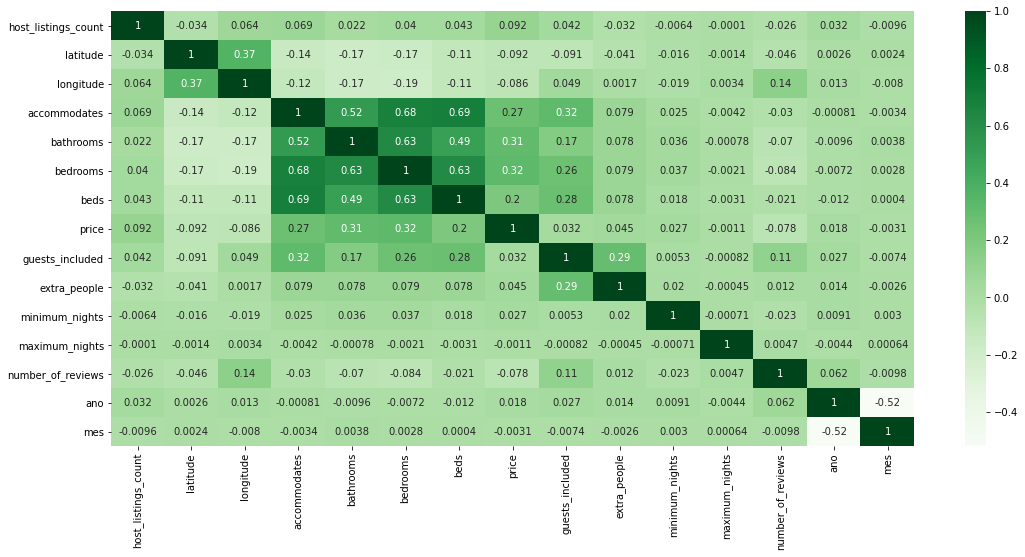

In [62]:
# Gráfico
plt.figure(figsize=(18,8))
sns.heatmap(base_airbnb.corr(), annot=True, cmap = 'Greens')

## Outliers

In [64]:
# criando funções para definir os Quartis

In [68]:
def limites(coluna):
    '''
    Define os limites do Outliers
    q1 = primeiro quartil
    q3 = terceiro quartil
    amplitude = q3 - q1
    limite inferior = q1 - 1.5 * amplitude
    limite superior = q3 + 1.5 * amplitude
    
    '''
    q1 = coluna.quantile(0.25)
    q3 = coluna.quantile(0.75)
    am = q3 - q1
    return q1 - 1.5 * am, q3 + 1.5 * am
    

In [67]:
print(limites(base_airbnb['bedrooms']))

(-0.5, 3.5)


In [101]:
# criar função de gráficos

def diagrama_caixa(coluna):
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_size_inches(15,5)
    
    sns.boxplot(x=coluna, ax=ax1)
    
    ax2.set_xlim(limites(coluna))
    sns.boxplot(x=coluna, ax=ax2)
    
def histograma(coluna):
    plt.figure(figsize=(15,5))
    sns.distplot(coluna, hist=True)
    
    
def excluir_outliers(df, coluna):
    qtd_linhas = df.shape[0]
    # df = df.loc[linhas, colunas]
    linf, lsup = limites(df[coluna])
    df = df.loc[(df[coluna] >= linf) & (df[coluna] <= lsup),:]
    return df, qtd_linhas - df.shape[0]

def conta_outliers(df, coluna):
    linf, lsup = limites(df[coluna])
    qtd = df.shape[0] - df[(df[coluna] >= linf) & (df[coluna] <= lsup)].count()
    return qtd
    

### Analise price

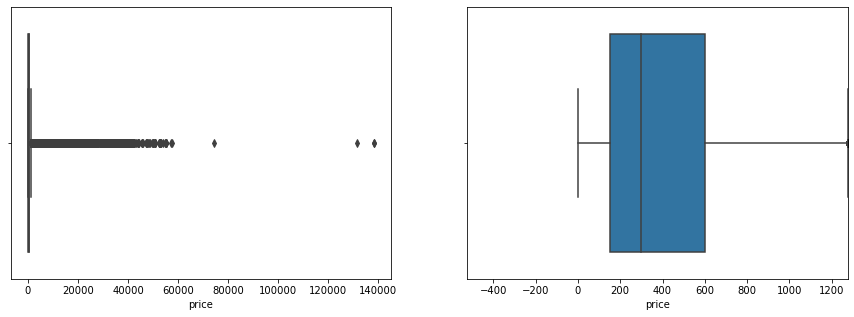

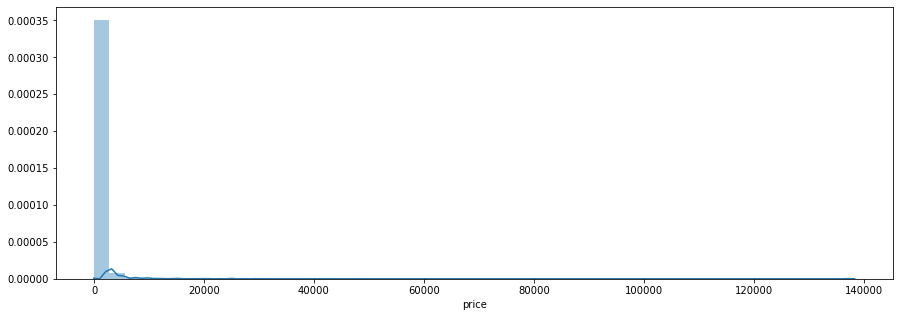

In [76]:
diagrama_caixa(base_airbnb['price'])
histograma(base_airbnb['price'])

In [88]:
# contar quantas observações estão fora do limites

#li, ls = limites(base_airbnb['price'])

#base_airbnb[(base_airbnb['price'] >= li) & (base_airbnb['price'] <= ls)].count()

base_airbnb, qtd = excluir_outliers(base_airbnb, 'price')

print('{} linhas removidas '.format(qtd))

87282 linhas removidas 


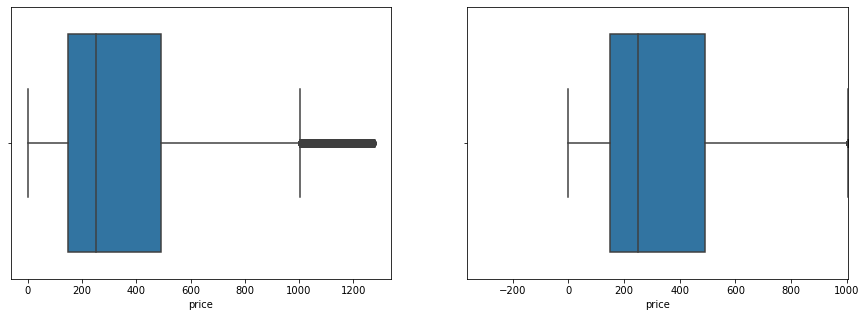

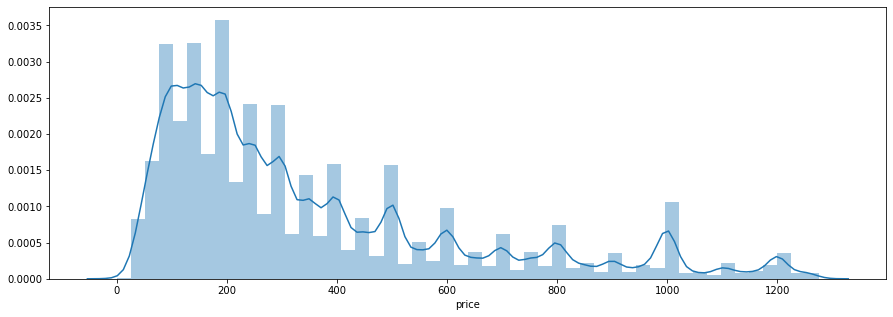

In [89]:
# ver como ficou a distribuição com o outliers do price, removido
diagrama_caixa(base_airbnb['price'])
histograma(base_airbnb['price'])

### Analise extra_people

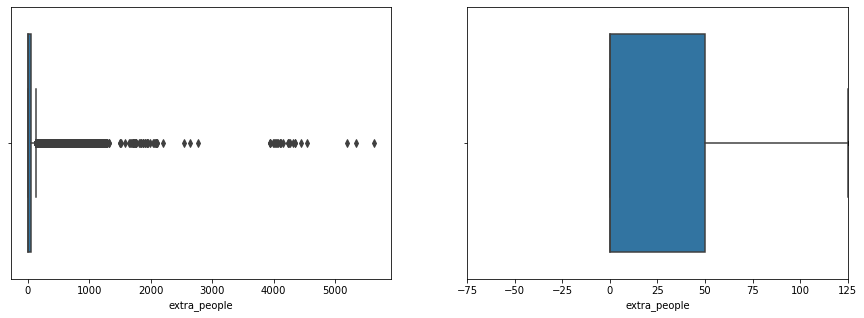

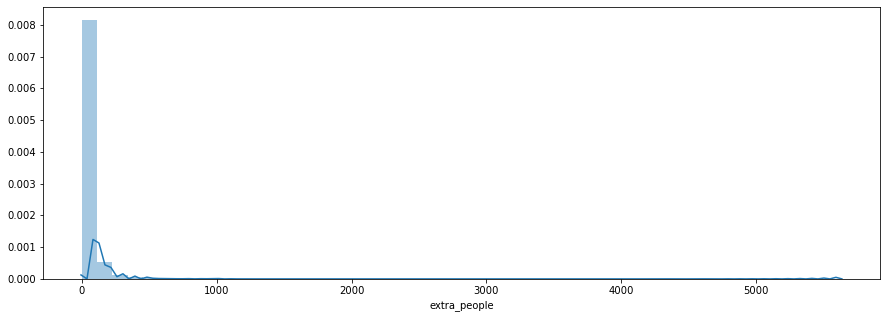

In [90]:
diagrama_caixa(base_airbnb['extra_people'])
histograma(base_airbnb['extra_people'])

In [103]:
print(conta_outliers(base_airbnb, 'extra_people').unique())
# vou manter os outliers

[59194]


In [104]:
base_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 810427 entries, 0 to 34328
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   host_is_superhost         810427 non-null  object 
 1   host_listings_count       810427 non-null  float64
 2   latitude                  810427 non-null  float64
 3   longitude                 810427 non-null  float64
 4   property_type             810427 non-null  object 
 5   room_type                 810427 non-null  object 
 6   accommodates              810427 non-null  int64  
 7   bathrooms                 810427 non-null  float64
 8   bedrooms                  810427 non-null  float64
 9   beds                      810427 non-null  float64
 10  bed_type                  810427 non-null  object 
 11  amenities                 810427 non-null  object 
 12  price                     810427 non-null  float32
 13  guests_included           810427 non-null  in

host_listings_count      
accommodates             
bathrooms                
bedrooms                 
beds                     
bed_type                 
guests_included          
minimum_nights           
maximum_nights           
number_of_reviews        

In [111]:
# base_airbnb.to_csv('base1.csv', sep = ';')

#b = pd.read_csv('base1.csv', sep = ';')
b = pd.DataFrame()
b

""
